# 把已经添加了一些列的PLC数据转换为1min的总结


In [185]:
#探索PLC文件不同分钟的细节
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

import os.path
import datetime
#训练文件夹
SensorFolder='H:\\12_Kaggle\\toollife\\01-TrainingData-additional'
TrainFolder='H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed'
TrainFile=os.path.join(TrainFolder,'PLC_All_ORemoved_1213.csv')

# TrainFolder='H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed'
dstfile=os.path.join(TrainFolder,'PLC_All_1s_Feature.csv')
dstfile=os.path.join(TrainFolder,'All_1s_Feature.csv')

In [3]:
#从PLC_ALL中去掉已经确定的outlier

df_all=pd.read_csv(TrainFile)

In [4]:
outlierlist=[[0,1],
             [0,2],
             [0,13],
             [0,29],
             [1,1],
             [1,8],
             [1,14],
             [1,21],
             [1,25],
             [1,34],
             [1,35],
             [1,42],
             [2,1],
             [2,8],
             [2,20],
             [2,30],
             [2,37]]

In [71]:
#一些函数
def timediff(x1,x2): #两个时间的时间差，如果是最后毫秒是两位数，需要补一个0
    if len(x1.split(':')[3])==2:
        x1=':'.join(x1.split(':')[:3])+':0'+x1.split(':')[3]
    if len(x2.split(':')[3])==2:
        x2=':'.join(x2.split(':')[:3])+':0'+x2.split(':')[3]
    return (datetime.datetime.strptime(x1,"%H:%M:%S:%f")-datetime.datetime.strptime(x2,"%H:%M:%S:%f")).total_seconds()

#一个df中最大最小的时间差，df要按顺序排好
def df_timediff(df):
    
    t_end=df.loc[df.index.max(),'time']
    t_start=df.loc[df.index.min(),'time']
    diff=timediff(t_start,t_end)
    return diff

#根据m,csv,second计算寿命,1,2,都是48,3是37,m=0,1,2, csv=1,,,,48 or 37
def life_calculate(m,csv,sec):
    
    if m==0 or m==1:
        l=240-(csv-1)*5-(sec/60)
    
    if m==2:
        l=185-(csv-1)*5-(sec/60)
    return l

In [67]:
life(0,1,60)

239.0

In [229]:
x1='12:19:00:80'

In [237]:
x1.split(':')

['12', '19', '00', '80']

In [246]:
':'.join(x1.split(':')[:3])+':0'+x1.split(':')[3]

'12:19:00:080'

In [227]:
timediff('12:19:00:070',)

-0.11

In [6]:
dfc

NameError: name 'dfc' is not defined

In [151]:
#找到一个df中，刚好1s，2s。。。位置的行数,以及最大的每行之前的timegap
def find_time_interval(df):
    r=df.count()[0] #总行数
    print(r)
    xlist=[]
    
    start_time=df.loc[df.index.min(),'time']
#     print('start',start_time)
    compare_target=1
    xlist.append(df.index.min())
    for i in range(r): #遍历
        
        r_index=i+df.index.min()
#         print(r_index)
        time_this_row=df.loc[r_index,'time']
#         print('time,this row',time_this_row)
        
        time_to_compare=timediff(time_this_row,start_time)
        
#         print(time_to_compare,'compare target',compare_target)
        
        if time_to_compare>=compare_target:
            
            xlist.append(r_index) #第一个是达到1min的时候的index
#             print(xlist)
            compare_target+=1  #需要对比的值增加1
            
    return xlist
        


In [152]:
pointlist=find_time_interval(dfc)
pointlist

2338


[0,
 38,
 77,
 113,
 152,
 188,
 224,
 265,
 301,
 337,
 376,
 412,
 450,
 486,
 527,
 564,
 602,
 642,
 683,
 720,
 758,
 798,
 837,
 880,
 920,
 962,
 1000,
 1040,
 1083,
 1120,
 1160,
 1197,
 1239,
 1279,
 1318,
 1358,
 1396,
 1436,
 1477,
 1514,
 1556,
 1596,
 1637,
 1677,
 1717,
 1759,
 1797,
 1838,
 1877,
 1916,
 1953,
 1994,
 2031,
 2070,
 2119,
 2146,
 2184,
 2222,
 2262,
 2296]

In [150]:
len(pointlist)

60

In [146]:
dfc.count()

Unnamed: 0        2338
Unnamed: 0.1      2338
Unnamed: 0.1.1    2338
time              2338
spindle_load      2338
x                 2338
y                 2338
z                 2338
csv_no            2338
x_displacement    2338
y_displacement    2338
z_displacement    2338
displacement      2338
x_move            2338
y_move            2338
z_move            2338
Machine           2338
dtype: int64

In [279]:
len(pointlist)

59

In [178]:
df_all=pd.read_csv(TrainFile)

In [179]:
df_all.columns,df_all.count()[0]

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'time', 'spindle_load',
        'x', 'y', 'z', 'csv_no', 'x_displacement', 'y_displacement',
        'z_displacement', 'displacement', 'x_move', 'y_move', 'z_move',
        'Machine'],
       dtype='object'), 264808)

In [287]:
dfc.loc[13779:13780]


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,time,spindle_load,x,y,z,csv_no,x_displacement,y_displacement,z_displacement,displacement,x_move,y_move,z_move,Machine
13779,18151,18151,0,12:19:00:70,13.721122,-830.5741,-2.3353,-431.92,9,0.0,0.0,0.0,0.0,0,0,0,0
13780,18152,18152,1,12:19:00:80,13.721122,-830.5741,-2.3353,-431.92,9,0.0,0.0,0.0,0.0,0,0,0,0


In [289]:
dfp=dfc.loc[pointlist[0]:pointlist[1]] 
dfp

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,time,spindle_load,x,y,z,csv_no,x_displacement,y_displacement,z_displacement,displacement,x_move,y_move,z_move,Machine
13821,18193,18193,42,12:19:01:70,23.737297,-886.6961,-107.4156,-431.92,9,-34.5792,-18.6795,0.0,39.301969,1,1,0,0
13822,18194,18194,43,12:19:01:80,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13823,18195,18195,44,12:19:01:90,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13824,18196,18196,45,12:19:01:100,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13825,18197,18197,46,12:19:01:110,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13826,18198,18198,47,12:19:01:120,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13827,18199,18199,48,12:19:01:130,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13828,18200,18200,49,12:19:01:140,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13829,18201,18201,50,12:19:01:150,23.737297,-886.6961,-107.4156,-431.92,9,0.0000,0.0000,0.0,0.000000,0,0,0,0
13830,18202,18202,51,12:19:01:350,15.655995,-901.5043,-122.0840,-431.92,9,-14.8082,-14.6684,0.0,20.843338,1,1,0,0


In [138]:
len(pointlist)

59

In [142]:
pointlist

[38,
 77,
 113,
 152,
 188,
 224,
 265,
 301,
 337,
 376,
 412,
 450,
 486,
 527,
 564,
 602,
 642,
 683,
 720,
 758,
 798,
 837,
 880,
 920,
 962,
 1000,
 1040,
 1083,
 1120,
 1160,
 1197,
 1239,
 1279,
 1318,
 1358,
 1396,
 1436,
 1477,
 1514,
 1556,
 1596,
 1637,
 1677,
 1717,
 1759,
 1797,
 1838,
 1877,
 1916,
 1953,
 1994,
 2031,
 2070,
 2119,
 2146,
 2184,
 2222,
 2262,
 2296]

In [169]:
#遍历，从开始算0秒，到差距>=1s，作为一个df，然后计算feature
#这里也要读sensor数据进来

plc_intervals=60 #需要plc数据分成的段数
sensor_interval=25600 #sensor每一段的数量

f_all_list=[]

for m in range(0,3):
    dfm=df_all[df_all['Machine']==m]
    csv_count=dfm.csv_no.max()
    print('machine..',m)
    for csv in range(1,csv_count):
        print('csv',csv)
        dfc=dfm[dfm['csv_no']==csv]
        #因为去掉了，可能会有csv是空的，就跳过
        if dfc.count()[0]==0:continue
            
        #如果plc数据有，也读sensor数据进来一起处理
        sensorfile=os.path.join(SensorFolder,'0'+str(m+1)+'\\Sensor\\'+str(csv)+'.csv')
        print('sensorfile',sensorfile)
        dfs=pd.read_csv(sensorfile)
        
        
        #把plc和sensor对应起来，sensor数据往往是刚好25600*60s或者更多
        #sensor数据每次取前边的1536000个数据，作为60s，分别取25600作为一段，
        #plc数据一般不够60s，直接取开始的时候开始，前59段是完整的
        
        t_start=dfc.loc[dfc.index.min(),'time']
        t_end=dfc.loc[dfc.index.max(),'time']
        timeto60=timediff(t_start,t_end)
        
        pointlist=find_time_interval(dfc) #找到分割dfc的点，pointlist[0] 和pointlist[1]之间代表着第一s的数据
        
        for i in range(plc_intervals):
            sec=str(i+1)
#             print('plc seconds',i)
            #找到plc数据中代表一段时间的df,pointlist中有59个点，0-1是第一段，59一直到结束
            
            if i==plc_intervals-1:
                dfp=dfc.loc[pointlist[i]:] #如果是最后一个interval，则直接到最后
            else:
                dfp=dfc.loc[pointlist[i]:pointlist[i+1]]  #loc 用索引，iloc可以直接用开头
            
            #开始计算feature
            df=dfp
            
            duration=df_timediff(df)

            [c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max]=df['spindle_load'].describe()

            x_disp_max=df['x_displacement'].abs().max()
            x_disp_sum=df['x_displacement'].abs().sum()
            x_disp_mean=df[df['x_displacement']!=0].x_displacement.abs().mean()

            y_disp_max=df['y_displacement'].abs().max()
            y_disp_sum=df['y_displacement'].abs().sum()
            y_disp_mean=df[df['y_displacement']!=0].y_displacement.abs().mean()

            z_disp_max=df['z_displacement'].abs().max()
            z_disp_sum=df['z_displacement'].abs().sum()
            z_disp_mean=df[df['z_displacement']!=0].z_displacement.abs().mean()

            x_move_count=df[df['x_move']!=0].count()[0]
            y_move_count=df[df['y_move']!=0].count()[0]
            z_move_count=df[df['z_move']!=0].count()[0]

            all_displacement=df['displacement'].sum()
            
            #所有PLC的feature变成一个list
            f_plc=[m,csv,i,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max,
                   x_disp_max,x_disp_mean,x_disp_sum,
                   y_disp_max,y_disp_mean,y_disp_sum,
                   z_disp_max,z_disp_mean,z_disp_sum,
                   x_move_count,y_move_count,z_move_count,
                   all_displacement
                  ]
#             print('plc feature',f_plc)
            
            #读入sensor数据的DataFrame dfs,,每一秒的sensor数据叫做dfq
            SensorInterval=25600
            dfq=dfs.iloc[i*SensorInterval:(i+1)*SensorInterval]
            print('m: ',m,'csv no: ',csv,'sensor seconds',i,'duration',duration)
            
            #sensor 数据，最基本包括3列振动，1列电流的基本描述min,max，std等，
            #以及variance，  Mean Square，裕度，峭度等
            
            v1_des=list(dfq['vibration_1'].describe())
            v2_des=list(dfq['vibration_2'].describe())
            v3_des=list(dfq['vibration_3'].describe())
            current_des=list(dfq['current'].describe())
            
            #均方根Xrms的平方
            v1_rms=(dfq['vibration_1']**2).sum()/dfq.count()[0]
            v2_rms=(dfq['vibration_2']**2).sum()/dfq.count()[0]
            v3_rms=(dfq['vibration_3']**2).sum()/dfq.count()[0]
            
            #峰值指标Ip=Xp/Xrms，Xp为一个系列中最大的10个值的平均
            v1_Xp=dfq.nlargest(10,'vibration_1')['vibration_1'].mean()
            v2_Xp=dfq.nlargest(10,'vibration_2')['vibration_2'].mean()
            v3_Xp=dfq.nlargest(10,'vibration_3')['vibration_3'].mean()
            
            v1_Ip=v1_Xp/(v1_rms**0.5)
            v2_Ip=v1_Xp/(v2_rms**0.5)
            v3_Ip=v1_Xp/(v3_rms**0.5)
            
            #脉冲指标Cf=Xp/Xmean
            v1_Cf=v1_Xp/dfq['vibration_1'].mean()
            v2_Cf=v1_Xp/dfq['vibration_2'].mean()
            v3_Cf=v1_Xp/dfq['vibration_3'].mean()
            
            #裕度指标Ce=Xrms/Xmean
            v1_Ce=(v1_rms**0.5)/dfq['vibration_1'].mean()
            v2_Ce=(v1_rms**0.5)/dfq['vibration_2'].mean()
            v3_Ce=(v1_rms**0.5)/dfq['vibration_3'].mean()
            
            #歪度指标Cw，反应非对称，三阶矩平均
            v1_Cw=(((dfq['vibration_1']-dfq['vibration_1'].mean())**3).mean()/dfq.count()[0])/(v1_rms**(0.5*3))
            v2_Cw=(((dfq['vibration_2']-dfq['vibration_2'].mean())**3).mean()/dfq.count()[0])/(v2_rms**(0.5*3))
            v3_Cw=(((dfq['vibration_3']-dfq['vibration_3'].mean())**3).mean()/dfq.count()[0])/(v3_rms**(0.5*3))
            
            #峭度指标，四阶矩平均
            v1_Cq=(((dfq['vibration_1']-dfq['vibration_1'].mean())**4).mean()/dfq.count()[0])/(v1_rms**(0.5*4))
            v2_Cq=(((dfq['vibration_2']-dfq['vibration_2'].mean())**4).mean()/dfq.count()[0])/(v2_rms**(0.5*4))
            v3_Cq=(((dfq['vibration_3']-dfq['vibration_3'].mean())**4).mean()/dfq.count()[0])/(v3_rms**(0.5*4))
            
            #--》所有sensor的feature，变成一个list
            l=v1_des+v2_des+v3_des+current_des
            f_sensor=l+[v1_rms,v1_Xp,v1_Ip,v1_Cf,v1_Ce,v1_Cw,v1_Cq,
                       v2_rms,v2_Xp,v2_Ip,v2_Cf,v2_Ce,v2_Cw,v2_Cq,
                       v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq]
            
            #计算寿命
            remain=life_calculate(m,csv,i)
            
            #f_plc, f_sensor, life拼接起来
            f_all=(f_plc+f_sensor)
            f_all.append(remain)
            
            f_all_list.append(f_all)
            

machine.. 0
csv 1
csv 2
csv 3
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\3.csv
2338
m:  0 csv no:  3 sensor seconds 0 duration -1.0
m:  0 csv no:  3 sensor seconds 1 duration -1.0
m:  0 csv no:  3 sensor seconds 2 duration -1.02
m:  0 csv no:  3 sensor seconds 3 duration -0.99
m:  0 csv no:  3 sensor seconds 4 duration -1.01
m:  0 csv no:  3 sensor seconds 5 duration -0.99
m:  0 csv no:  3 sensor seconds 6 duration -0.99
m:  0 csv no:  3 sensor seconds 7 duration -1.02
m:  0 csv no:  3 sensor seconds 8 duration -0.99
m:  0 csv no:  3 sensor seconds 9 duration -1.0
m:  0 csv no:  3 sensor seconds 10 duration -1.345
m:  0 csv no:  3 sensor seconds 11 duration -1.0
m:  0 csv no:  3 sensor seconds 12 duration -1.0
m:  0 csv no:  3 sensor seconds 13 duration -1.0
m:  0 csv no:  3 sensor seconds 14 duration -1.0
m:  0 csv no:  3 sensor seconds 15 duration -1.0
m:  0 csv no:  3 sensor seconds 16 duration -1.0
m:  0 csv no:  3 sensor seconds 17 duration -1.0
m:  0 cs

m:  0 csv no:  5 sensor seconds 43 duration -1.0
m:  0 csv no:  5 sensor seconds 44 duration -1.0
m:  0 csv no:  5 sensor seconds 45 duration -1.03
m:  0 csv no:  5 sensor seconds 46 duration -0.98
m:  0 csv no:  5 sensor seconds 47 duration -1.01
m:  0 csv no:  5 sensor seconds 48 duration -1.0
m:  0 csv no:  5 sensor seconds 49 duration -1.01
m:  0 csv no:  5 sensor seconds 50 duration -1.0
m:  0 csv no:  5 sensor seconds 51 duration -1.474
m:  0 csv no:  5 sensor seconds 52 duration -0.516
m:  0 csv no:  5 sensor seconds 53 duration -1.01
m:  0 csv no:  5 sensor seconds 54 duration -1.081
m:  0 csv no:  5 sensor seconds 55 duration -0.92
m:  0 csv no:  5 sensor seconds 56 duration -1.01
m:  0 csv no:  5 sensor seconds 57 duration -1.563
m:  0 csv no:  5 sensor seconds 58 duration -0.447
m:  0 csv no:  5 sensor seconds 59 duration -0.84
csv 6
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\6.csv
2267
m:  0 csv no:  6 sensor seconds 0 duration -1.0
m:  0 csv no: 

m:  0 csv no:  8 sensor seconds 24 duration -1.19
m:  0 csv no:  8 sensor seconds 25 duration -0.99
m:  0 csv no:  8 sensor seconds 26 duration -0.82
m:  0 csv no:  8 sensor seconds 27 duration -1.0
m:  0 csv no:  8 sensor seconds 28 duration -1.0
m:  0 csv no:  8 sensor seconds 29 duration -1.0
m:  0 csv no:  8 sensor seconds 30 duration -1.0
m:  0 csv no:  8 sensor seconds 31 duration -1.0
m:  0 csv no:  8 sensor seconds 32 duration -1.0
m:  0 csv no:  8 sensor seconds 33 duration -1.0
m:  0 csv no:  8 sensor seconds 34 duration -1.0
m:  0 csv no:  8 sensor seconds 35 duration -1.0
m:  0 csv no:  8 sensor seconds 36 duration -1.0
m:  0 csv no:  8 sensor seconds 37 duration -1.0
m:  0 csv no:  8 sensor seconds 38 duration -1.0
m:  0 csv no:  8 sensor seconds 39 duration -1.0
m:  0 csv no:  8 sensor seconds 40 duration -1.22
m:  0 csv no:  8 sensor seconds 41 duration -0.78
m:  0 csv no:  8 sensor seconds 42 duration -1.0
m:  0 csv no:  8 sensor seconds 43 duration -1.0
m:  0 csv no:  

m:  0 csv no:  11 sensor seconds 5 duration -1.0
m:  0 csv no:  11 sensor seconds 6 duration -1.0
m:  0 csv no:  11 sensor seconds 7 duration -1.0
m:  0 csv no:  11 sensor seconds 8 duration -1.0
m:  0 csv no:  11 sensor seconds 9 duration -0.743
m:  0 csv no:  11 sensor seconds 10 duration -1.257
m:  0 csv no:  11 sensor seconds 11 duration -1.0
m:  0 csv no:  11 sensor seconds 12 duration -1.0
m:  0 csv no:  11 sensor seconds 13 duration -1.0
m:  0 csv no:  11 sensor seconds 14 duration -1.0
m:  0 csv no:  11 sensor seconds 15 duration -1.0
m:  0 csv no:  11 sensor seconds 16 duration -0.743
m:  0 csv no:  11 sensor seconds 17 duration -1.0
m:  0 csv no:  11 sensor seconds 18 duration -1.257
m:  0 csv no:  11 sensor seconds 19 duration -1.0
m:  0 csv no:  11 sensor seconds 20 duration -0.743
m:  0 csv no:  11 sensor seconds 21 duration -1.0
m:  0 csv no:  11 sensor seconds 22 duration -1.0
m:  0 csv no:  11 sensor seconds 23 duration -1.01
m:  0 csv no:  11 sensor seconds 24 duration

m:  0 csv no:  14 sensor seconds 46 duration -1.0
m:  0 csv no:  14 sensor seconds 47 duration -1.0
m:  0 csv no:  14 sensor seconds 48 duration -1.0
m:  0 csv no:  14 sensor seconds 49 duration -1.0
m:  0 csv no:  14 sensor seconds 50 duration -1.0
m:  0 csv no:  14 sensor seconds 51 duration -1.04
m:  0 csv no:  14 sensor seconds 52 duration -0.97
m:  0 csv no:  14 sensor seconds 53 duration -1.04
m:  0 csv no:  14 sensor seconds 54 duration -1.01
m:  0 csv no:  14 sensor seconds 55 duration -0.94
m:  0 csv no:  14 sensor seconds 56 duration -1.04
m:  0 csv no:  14 sensor seconds 57 duration -0.96
m:  0 csv no:  14 sensor seconds 58 duration -1.0
m:  0 csv no:  14 sensor seconds 59 duration -0.84
csv 15
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\15.csv
2267
m:  0 csv no:  15 sensor seconds 0 duration -1.14
m:  0 csv no:  15 sensor seconds 1 duration -0.86
m:  0 csv no:  15 sensor seconds 2 duration -1.0
m:  0 csv no:  15 sensor seconds 3 duration -1.197
m: 

m:  0 csv no:  17 sensor seconds 24 duration -1.02
m:  0 csv no:  17 sensor seconds 25 duration -0.99
m:  0 csv no:  17 sensor seconds 26 duration -1.02
m:  0 csv no:  17 sensor seconds 27 duration -0.97
m:  0 csv no:  17 sensor seconds 28 duration -1.01
m:  0 csv no:  17 sensor seconds 29 duration -1.02
m:  0 csv no:  17 sensor seconds 30 duration -1.02
m:  0 csv no:  17 sensor seconds 31 duration -1.08
m:  0 csv no:  17 sensor seconds 32 duration -0.966
m:  0 csv no:  17 sensor seconds 33 duration -1.0
m:  0 csv no:  17 sensor seconds 34 duration -0.944
m:  0 csv no:  17 sensor seconds 35 duration -0.99
m:  0 csv no:  17 sensor seconds 36 duration -1.01
m:  0 csv no:  17 sensor seconds 37 duration -0.99
m:  0 csv no:  17 sensor seconds 38 duration -1.01
m:  0 csv no:  17 sensor seconds 39 duration -1.0
m:  0 csv no:  17 sensor seconds 40 duration -0.99
m:  0 csv no:  17 sensor seconds 41 duration -1.01
m:  0 csv no:  17 sensor seconds 42 duration -1.01
m:  0 csv no:  17 sensor second

m:  0 csv no:  20 sensor seconds 3 duration -0.119
m:  0 csv no:  20 sensor seconds 4 duration -1.01
m:  0 csv no:  20 sensor seconds 5 duration -0.88
m:  0 csv no:  20 sensor seconds 6 duration -1.11
m:  0 csv no:  20 sensor seconds 7 duration -0.89
m:  0 csv no:  20 sensor seconds 8 duration -1.11
m:  0 csv no:  20 sensor seconds 9 duration -0.91
m:  0 csv no:  20 sensor seconds 10 duration -0.971
m:  0 csv no:  20 sensor seconds 11 duration -1.009
m:  0 csv no:  20 sensor seconds 12 duration -1.0
m:  0 csv no:  20 sensor seconds 13 duration -1.0
m:  0 csv no:  20 sensor seconds 14 duration -0.991
m:  0 csv no:  20 sensor seconds 15 duration -1.009
m:  0 csv no:  20 sensor seconds 16 duration -1.0
m:  0 csv no:  20 sensor seconds 17 duration -1.0
m:  0 csv no:  20 sensor seconds 18 duration -1.0
m:  0 csv no:  20 sensor seconds 19 duration -1.0
m:  0 csv no:  20 sensor seconds 20 duration -1.0
m:  0 csv no:  20 sensor seconds 21 duration -1.0
m:  0 csv no:  20 sensor seconds 22 durat

m:  0 csv no:  22 sensor seconds 42 duration -0.477
m:  0 csv no:  22 sensor seconds 43 duration -1.523
m:  0 csv no:  22 sensor seconds 44 duration -0.467
m:  0 csv no:  22 sensor seconds 45 duration -1.533
m:  0 csv no:  22 sensor seconds 46 duration -1.0
m:  0 csv no:  22 sensor seconds 47 duration -1.0
m:  0 csv no:  22 sensor seconds 48 duration -1.0
m:  0 csv no:  22 sensor seconds 49 duration -0.387
m:  0 csv no:  22 sensor seconds 50 duration -1.613
m:  0 csv no:  22 sensor seconds 51 duration -1.0
m:  0 csv no:  22 sensor seconds 52 duration -1.0
m:  0 csv no:  22 sensor seconds 53 duration -1.0
m:  0 csv no:  22 sensor seconds 54 duration -1.0
m:  0 csv no:  22 sensor seconds 55 duration -1.0
m:  0 csv no:  22 sensor seconds 56 duration -1.0
m:  0 csv no:  22 sensor seconds 57 duration -1.0
m:  0 csv no:  22 sensor seconds 58 duration -1.0
m:  0 csv no:  22 sensor seconds 59 duration -0.297
csv 23
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\23.csv
22

m:  0 csv no:  25 sensor seconds 20 duration -1.196
m:  0 csv no:  25 sensor seconds 21 duration -1.0
m:  0 csv no:  25 sensor seconds 22 duration -1.0
m:  0 csv no:  25 sensor seconds 23 duration -1.0
m:  0 csv no:  25 sensor seconds 24 duration -0.804
m:  0 csv no:  25 sensor seconds 25 duration -1.196
m:  0 csv no:  25 sensor seconds 26 duration -1.0
m:  0 csv no:  25 sensor seconds 27 duration -1.0
m:  0 csv no:  25 sensor seconds 28 duration -1.0
m:  0 csv no:  25 sensor seconds 29 duration -1.0
m:  0 csv no:  25 sensor seconds 30 duration -1.0
m:  0 csv no:  25 sensor seconds 31 duration -0.824
m:  0 csv no:  25 sensor seconds 32 duration -1.176
m:  0 csv no:  25 sensor seconds 33 duration -0.824
m:  0 csv no:  25 sensor seconds 34 duration -1.176
m:  0 csv no:  25 sensor seconds 35 duration -1.0
m:  0 csv no:  25 sensor seconds 36 duration -1.0
m:  0 csv no:  25 sensor seconds 37 duration -1.0
m:  0 csv no:  25 sensor seconds 38 duration -1.0
m:  0 csv no:  25 sensor seconds 39 

csv 28
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\28.csv
2330
m:  0 csv no:  28 sensor seconds 0 duration -1.137
m:  0 csv no:  28 sensor seconds 1 duration -0.87
m:  0 csv no:  28 sensor seconds 2 duration -1.05
m:  0 csv no:  28 sensor seconds 3 duration -0.943
m:  0 csv no:  28 sensor seconds 4 duration -1.057
m:  0 csv no:  28 sensor seconds 5 duration -1.02
m:  0 csv no:  28 sensor seconds 6 duration -0.98
m:  0 csv no:  28 sensor seconds 7 duration -0.943
m:  0 csv no:  28 sensor seconds 8 duration -1.007
m:  0 csv no:  28 sensor seconds 9 duration -1.08
m:  0 csv no:  28 sensor seconds 10 duration -0.99
m:  0 csv no:  28 sensor seconds 11 duration -0.923
m:  0 csv no:  28 sensor seconds 12 duration -1.077
m:  0 csv no:  28 sensor seconds 13 duration -1.0
m:  0 csv no:  28 sensor seconds 14 duration -1.01
m:  0 csv no:  28 sensor seconds 15 duration -1.0
m:  0 csv no:  28 sensor seconds 16 duration -1.0
m:  0 csv no:  28 sensor seconds 17 duration -1.0


m:  0 csv no:  31 sensor seconds 37 duration -1.01
m:  0 csv no:  31 sensor seconds 38 duration -0.99
m:  0 csv no:  31 sensor seconds 39 duration -1.0
m:  0 csv no:  31 sensor seconds 40 duration -1.0
m:  0 csv no:  31 sensor seconds 41 duration -1.0
m:  0 csv no:  31 sensor seconds 42 duration -1.0
m:  0 csv no:  31 sensor seconds 43 duration -1.04
m:  0 csv no:  31 sensor seconds 44 duration -0.96
m:  0 csv no:  31 sensor seconds 45 duration -1.05
m:  0 csv no:  31 sensor seconds 46 duration -0.99
m:  0 csv no:  31 sensor seconds 47 duration -1.0
m:  0 csv no:  31 sensor seconds 48 duration -1.01
m:  0 csv no:  31 sensor seconds 49 duration -1.0
m:  0 csv no:  31 sensor seconds 50 duration -0.99
m:  0 csv no:  31 sensor seconds 51 duration -1.01
m:  0 csv no:  31 sensor seconds 52 duration -0.99
m:  0 csv no:  31 sensor seconds 53 duration -1.01
m:  0 csv no:  31 sensor seconds 54 duration -1.0
m:  0 csv no:  31 sensor seconds 55 duration -1.0
m:  0 csv no:  31 sensor seconds 56 dur

m:  0 csv no:  34 sensor seconds 15 duration -0.97
m:  0 csv no:  34 sensor seconds 16 duration -1.02
m:  0 csv no:  34 sensor seconds 17 duration -0.99
m:  0 csv no:  34 sensor seconds 18 duration -1.06
m:  0 csv no:  34 sensor seconds 19 duration -0.94
m:  0 csv no:  34 sensor seconds 20 duration -1.04
m:  0 csv no:  34 sensor seconds 21 duration -0.95
m:  0 csv no:  34 sensor seconds 22 duration -1.03
m:  0 csv no:  34 sensor seconds 23 duration -0.98
m:  0 csv no:  34 sensor seconds 24 duration -1.05
m:  0 csv no:  34 sensor seconds 25 duration -0.97
m:  0 csv no:  34 sensor seconds 26 duration -1.0
m:  0 csv no:  34 sensor seconds 27 duration -0.99
m:  0 csv no:  34 sensor seconds 28 duration -1.01
m:  0 csv no:  34 sensor seconds 29 duration -0.98
m:  0 csv no:  34 sensor seconds 30 duration -1.02
m:  0 csv no:  34 sensor seconds 31 duration -1.0
m:  0 csv no:  34 sensor seconds 32 duration -1.01
m:  0 csv no:  34 sensor seconds 33 duration -0.99
m:  0 csv no:  34 sensor seconds 

m:  0 csv no:  36 sensor seconds 56 duration -0.98
m:  0 csv no:  36 sensor seconds 57 duration -1.02
m:  0 csv no:  36 sensor seconds 58 duration -0.99
m:  0 csv no:  36 sensor seconds 59 duration -0.63
csv 37
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\37.csv
2317
m:  0 csv no:  37 sensor seconds 0 duration -1.177
m:  0 csv no:  37 sensor seconds 1 duration -0.823
m:  0 csv no:  37 sensor seconds 2 duration -1.0
m:  0 csv no:  37 sensor seconds 3 duration -1.05
m:  0 csv no:  37 sensor seconds 4 duration -0.96
m:  0 csv no:  37 sensor seconds 5 duration -1.0
m:  0 csv no:  37 sensor seconds 6 duration -1.0
m:  0 csv no:  37 sensor seconds 7 duration -1.0
m:  0 csv no:  37 sensor seconds 8 duration -1.01
m:  0 csv no:  37 sensor seconds 9 duration -1.157
m:  0 csv no:  37 sensor seconds 10 duration -0.843
m:  0 csv no:  37 sensor seconds 11 duration -1.0
m:  0 csv no:  37 sensor seconds 12 duration -1.02
m:  0 csv no:  37 sensor seconds 13 duration -0.98
m:  

m:  0 csv no:  39 sensor seconds 35 duration -1.02
m:  0 csv no:  39 sensor seconds 36 duration -0.97
m:  0 csv no:  39 sensor seconds 37 duration -1.02
m:  0 csv no:  39 sensor seconds 38 duration -0.99
m:  0 csv no:  39 sensor seconds 39 duration -1.01
m:  0 csv no:  39 sensor seconds 40 duration -1.0
m:  0 csv no:  39 sensor seconds 41 duration -1.01
m:  0 csv no:  39 sensor seconds 42 duration -1.02
m:  0 csv no:  39 sensor seconds 43 duration -0.97
m:  0 csv no:  39 sensor seconds 44 duration -1.0
m:  0 csv no:  39 sensor seconds 45 duration -1.01
m:  0 csv no:  39 sensor seconds 46 duration -0.99
m:  0 csv no:  39 sensor seconds 47 duration -1.02
m:  0 csv no:  39 sensor seconds 48 duration -0.99
m:  0 csv no:  39 sensor seconds 49 duration -1.0
m:  0 csv no:  39 sensor seconds 50 duration -1.0
m:  0 csv no:  39 sensor seconds 51 duration -1.01
m:  0 csv no:  39 sensor seconds 52 duration -1.01
m:  0 csv no:  39 sensor seconds 53 duration -1.01
m:  0 csv no:  39 sensor seconds 54

C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in longlong_scalars


m:  0 csv no:  40 sensor seconds 49 duration -1.01
m:  0 csv no:  40 sensor seconds 50 duration -0.98
m:  0 csv no:  40 sensor seconds 51 duration -1.01
m:  0 csv no:  40 sensor seconds 52 duration -0.955
m:  0 csv no:  40 sensor seconds 53 duration -1.045
m:  0 csv no:  40 sensor seconds 54 duration -1.0
m:  0 csv no:  40 sensor seconds 55 duration -1.01
m:  0 csv no:  40 sensor seconds 56 duration -0.945
m:  0 csv no:  40 sensor seconds 57 duration -1.045
m:  0 csv no:  40 sensor seconds 58 duration -1.01
m:  0 csv no:  40 sensor seconds 59 duration -0.37
csv 41
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\01\Sensor\41.csv
2281
m:  0 csv no:  41 sensor seconds 0 duration -1.287
m:  0 csv no:  41 sensor seconds 1 duration -0.713
m:  0 csv no:  41 sensor seconds 2 duration -1.0
m:  0 csv no:  41 sensor seconds 3 duration -1.0
m:  0 csv no:  41 sensor seconds 4 duration -1.287
m:  0 csv no:  41 sensor seconds 5 duration -0.713
m:  0 csv no:  41 sensor seconds 6 duration -

m:  0 csv no:  43 sensor seconds 26 duration -1.206
m:  0 csv no:  43 sensor seconds 27 duration -0.794
m:  0 csv no:  43 sensor seconds 28 duration -1.206
m:  0 csv no:  43 sensor seconds 29 duration -0.804
m:  0 csv no:  43 sensor seconds 30 duration -1.196
m:  0 csv no:  43 sensor seconds 31 duration -1.0
m:  0 csv no:  43 sensor seconds 32 duration -1.0
m:  0 csv no:  43 sensor seconds 33 duration -1.0
m:  0 csv no:  43 sensor seconds 34 duration -0.664
m:  0 csv no:  43 sensor seconds 35 duration -1.336
m:  0 csv no:  43 sensor seconds 36 duration -0.824
m:  0 csv no:  43 sensor seconds 37 duration -1.176
m:  0 csv no:  43 sensor seconds 38 duration -1.0
m:  0 csv no:  43 sensor seconds 39 duration -1.0
m:  0 csv no:  43 sensor seconds 40 duration -1.0
m:  0 csv no:  43 sensor seconds 41 duration -1.0
m:  0 csv no:  43 sensor seconds 42 duration -1.0
m:  0 csv no:  43 sensor seconds 43 duration -1.0
m:  0 csv no:  43 sensor seconds 44 duration -1.0
m:  0 csv no:  43 sensor seconds

m:  0 csv no:  46 sensor seconds 5 duration -1.0
m:  0 csv no:  46 sensor seconds 6 duration -0.992
m:  0 csv no:  46 sensor seconds 7 duration -1.008
m:  0 csv no:  46 sensor seconds 8 duration -1.0
m:  0 csv no:  46 sensor seconds 9 duration -1.0
m:  0 csv no:  46 sensor seconds 10 duration -1.0
m:  0 csv no:  46 sensor seconds 11 duration -1.0
m:  0 csv no:  46 sensor seconds 12 duration -1.0
m:  0 csv no:  46 sensor seconds 13 duration -1.0
m:  0 csv no:  46 sensor seconds 14 duration -1.06
m:  0 csv no:  46 sensor seconds 15 duration -1.17
m:  0 csv no:  46 sensor seconds 16 duration -0.77
m:  0 csv no:  46 sensor seconds 17 duration -1.0
m:  0 csv no:  46 sensor seconds 18 duration -1.0
m:  0 csv no:  46 sensor seconds 19 duration -1.02
m:  0 csv no:  46 sensor seconds 20 duration -1.0
m:  0 csv no:  46 sensor seconds 21 duration -0.98
m:  0 csv no:  46 sensor seconds 22 duration -1.0
m:  0 csv no:  46 sensor seconds 23 duration -1.0
m:  0 csv no:  46 sensor seconds 24 duration -

m:  1 csv no:  3 sensor seconds 48 duration -1.02
m:  1 csv no:  3 sensor seconds 49 duration -0.977
m:  1 csv no:  3 sensor seconds 50 duration -1.0
m:  1 csv no:  3 sensor seconds 51 duration -1.0
m:  1 csv no:  3 sensor seconds 52 duration -1.0
m:  1 csv no:  3 sensor seconds 53 duration -1.01
m:  1 csv no:  3 sensor seconds 54 duration -1.0
m:  1 csv no:  3 sensor seconds 55 duration -1.0
m:  1 csv no:  3 sensor seconds 56 duration -0.99
m:  1 csv no:  3 sensor seconds 57 duration -1.12
m:  1 csv no:  3 sensor seconds 58 duration -0.9
m:  1 csv no:  3 sensor seconds 59 duration -0.82
csv 4
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\02\Sensor\4.csv
2326
m:  1 csv no:  4 sensor seconds 0 duration -1.0
m:  1 csv no:  4 sensor seconds 1 duration -1.0
m:  1 csv no:  4 sensor seconds 2 duration -1.0
m:  1 csv no:  4 sensor seconds 3 duration -1.0
m:  1 csv no:  4 sensor seconds 4 duration -1.0
m:  1 csv no:  4 sensor seconds 5 duration -1.0
m:  1 csv no:  4 sensor second

m:  1 csv no:  6 sensor seconds 30 duration -1.0
m:  1 csv no:  6 sensor seconds 31 duration -1.0
m:  1 csv no:  6 sensor seconds 32 duration -1.0
m:  1 csv no:  6 sensor seconds 33 duration -1.0
m:  1 csv no:  6 sensor seconds 34 duration -0.754
m:  1 csv no:  6 sensor seconds 35 duration -1.246
m:  1 csv no:  6 sensor seconds 36 duration -0.754
m:  1 csv no:  6 sensor seconds 37 duration -1.246
m:  1 csv no:  6 sensor seconds 38 duration -1.0
m:  1 csv no:  6 sensor seconds 39 duration -0.774
m:  1 csv no:  6 sensor seconds 40 duration -1.226
m:  1 csv no:  6 sensor seconds 41 duration -0.764
m:  1 csv no:  6 sensor seconds 42 duration -0.99
m:  1 csv no:  6 sensor seconds 43 duration -1.0
m:  1 csv no:  6 sensor seconds 44 duration -1.246
m:  1 csv no:  6 sensor seconds 45 duration -1.0
m:  1 csv no:  6 sensor seconds 46 duration -0.764
m:  1 csv no:  6 sensor seconds 47 duration -1.236
m:  1 csv no:  6 sensor seconds 48 duration -1.0
m:  1 csv no:  6 sensor seconds 49 duration -1.0

m:  1 csv no:  10 sensor seconds 12 duration -1.09
m:  1 csv no:  10 sensor seconds 13 duration -0.91
m:  1 csv no:  10 sensor seconds 14 duration -1.0
m:  1 csv no:  10 sensor seconds 15 duration -1.03
m:  1 csv no:  10 sensor seconds 16 duration -0.97
m:  1 csv no:  10 sensor seconds 17 duration -1.0
m:  1 csv no:  10 sensor seconds 18 duration -1.0
m:  1 csv no:  10 sensor seconds 19 duration -1.0
m:  1 csv no:  10 sensor seconds 20 duration -1.0
m:  1 csv no:  10 sensor seconds 21 duration -1.0
m:  1 csv no:  10 sensor seconds 22 duration -1.0
m:  1 csv no:  10 sensor seconds 23 duration -1.0
m:  1 csv no:  10 sensor seconds 24 duration -1.0
m:  1 csv no:  10 sensor seconds 25 duration -1.0
m:  1 csv no:  10 sensor seconds 26 duration -1.0
m:  1 csv no:  10 sensor seconds 27 duration -1.01
m:  1 csv no:  10 sensor seconds 28 duration -0.99
m:  1 csv no:  10 sensor seconds 29 duration -1.05
m:  1 csv no:  10 sensor seconds 30 duration -1.01
m:  1 csv no:  10 sensor seconds 31 durati

m:  1 csv no:  12 sensor seconds 52 duration -1.0
m:  1 csv no:  12 sensor seconds 53 duration -1.07
m:  1 csv no:  12 sensor seconds 54 duration -1.01
m:  1 csv no:  12 sensor seconds 55 duration -0.93
m:  1 csv no:  12 sensor seconds 56 duration -0.99
m:  1 csv no:  12 sensor seconds 57 duration -1.0
m:  1 csv no:  12 sensor seconds 58 duration -1.02
m:  1 csv no:  12 sensor seconds 59 duration -0.83
csv 13
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\02\Sensor\13.csv
2389
m:  1 csv no:  13 sensor seconds 0 duration -1.0
m:  1 csv no:  13 sensor seconds 1 duration -1.104
m:  1 csv no:  13 sensor seconds 2 duration -0.896
m:  1 csv no:  13 sensor seconds 3 duration -1.0
m:  1 csv no:  13 sensor seconds 4 duration -1.0
m:  1 csv no:  13 sensor seconds 5 duration -1.112
m:  1 csv no:  13 sensor seconds 6 duration -1.01
m:  1 csv no:  13 sensor seconds 7 duration -1.0
m:  1 csv no:  13 sensor seconds 8 duration -1.01
m:  1 csv no:  13 sensor seconds 9 duration -1.0
m:  1 c

m:  1 csv no:  16 sensor seconds 30 duration -1.183
m:  1 csv no:  16 sensor seconds 31 duration -0.817
m:  1 csv no:  16 sensor seconds 32 duration -1.0
m:  1 csv no:  16 sensor seconds 33 duration -1.0
m:  1 csv no:  16 sensor seconds 34 duration -1.003
m:  1 csv no:  16 sensor seconds 35 duration -1.0
m:  1 csv no:  16 sensor seconds 36 duration -0.997
m:  1 csv no:  16 sensor seconds 37 duration -1.003
m:  1 csv no:  16 sensor seconds 38 duration -0.997
m:  1 csv no:  16 sensor seconds 39 duration -1.0
m:  1 csv no:  16 sensor seconds 40 duration -1.0
m:  1 csv no:  16 sensor seconds 41 duration -1.0
m:  1 csv no:  16 sensor seconds 42 duration -1.0
m:  1 csv no:  16 sensor seconds 43 duration -1.0
m:  1 csv no:  16 sensor seconds 44 duration -1.0
m:  1 csv no:  16 sensor seconds 45 duration -1.093
m:  1 csv no:  16 sensor seconds 46 duration -0.91
m:  1 csv no:  16 sensor seconds 47 duration -0.997
m:  1 csv no:  16 sensor seconds 48 duration -1.0
m:  1 csv no:  16 sensor seconds 

m:  1 csv no:  19 sensor seconds 9 duration -0.99
m:  1 csv no:  19 sensor seconds 10 duration -1.02
m:  1 csv no:  19 sensor seconds 11 duration -0.99
m:  1 csv no:  19 sensor seconds 12 duration -1.0
m:  1 csv no:  19 sensor seconds 13 duration -1.0
m:  1 csv no:  19 sensor seconds 14 duration -1.0
m:  1 csv no:  19 sensor seconds 15 duration -1.0
m:  1 csv no:  19 sensor seconds 16 duration -1.01
m:  1 csv no:  19 sensor seconds 17 duration -0.99
m:  1 csv no:  19 sensor seconds 18 duration -1.0
m:  1 csv no:  19 sensor seconds 19 duration -1.01
m:  1 csv no:  19 sensor seconds 20 duration -0.99
m:  1 csv no:  19 sensor seconds 21 duration -1.02
m:  1 csv no:  19 sensor seconds 22 duration -1.01
m:  1 csv no:  19 sensor seconds 23 duration -1.0
m:  1 csv no:  19 sensor seconds 24 duration -0.99
m:  1 csv no:  19 sensor seconds 25 duration -1.01
m:  1 csv no:  19 sensor seconds 26 duration -0.99
m:  1 csv no:  19 sensor seconds 27 duration -1.0
m:  1 csv no:  19 sensor seconds 28 dur

m:  1 csv no:  22 sensor seconds 48 duration -1.0
m:  1 csv no:  22 sensor seconds 49 duration -0.99
m:  1 csv no:  22 sensor seconds 50 duration -0.96
m:  1 csv no:  22 sensor seconds 51 duration -1.0
m:  1 csv no:  22 sensor seconds 52 duration -1.04
m:  1 csv no:  22 sensor seconds 53 duration -1.01
m:  1 csv no:  22 sensor seconds 54 duration -1.0
m:  1 csv no:  22 sensor seconds 55 duration -1.0
m:  1 csv no:  22 sensor seconds 56 duration -1.0
m:  1 csv no:  22 sensor seconds 57 duration -1.01
m:  1 csv no:  22 sensor seconds 58 duration -1.0
m:  1 csv no:  22 sensor seconds 59 duration -0.89
csv 23
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\02\Sensor\23.csv
2357
m:  1 csv no:  23 sensor seconds 0 duration -1.485
m:  1 csv no:  23 sensor seconds 1 duration -1.0
m:  1 csv no:  23 sensor seconds 2 duration -1.0
m:  1 csv no:  23 sensor seconds 3 duration -1.0
m:  1 csv no:  23 sensor seconds 4 duration -1.0
m:  1 csv no:  23 sensor seconds 5 duration -1.0
m:  1 csv

m:  1 csv no:  26 sensor seconds 27 duration -1.0
m:  1 csv no:  26 sensor seconds 28 duration -1.0
m:  1 csv no:  26 sensor seconds 29 duration -1.01
m:  1 csv no:  26 sensor seconds 30 duration -1.0
m:  1 csv no:  26 sensor seconds 31 duration -1.05
m:  1 csv no:  26 sensor seconds 32 duration -0.95
m:  1 csv no:  26 sensor seconds 33 duration -1.0
m:  1 csv no:  26 sensor seconds 34 duration -1.0
m:  1 csv no:  26 sensor seconds 35 duration -1.02
m:  1 csv no:  26 sensor seconds 36 duration -1.03
m:  1 csv no:  26 sensor seconds 37 duration -1.0
m:  1 csv no:  26 sensor seconds 38 duration -0.97
m:  1 csv no:  26 sensor seconds 39 duration -1.03
m:  1 csv no:  26 sensor seconds 40 duration -1.0
m:  1 csv no:  26 sensor seconds 41 duration -1.12
m:  1 csv no:  26 sensor seconds 42 duration -0.883
m:  1 csv no:  26 sensor seconds 43 duration -0.98
m:  1 csv no:  26 sensor seconds 44 duration -1.02
m:  1 csv no:  26 sensor seconds 45 duration -1.0
m:  1 csv no:  26 sensor seconds 46 du

m:  1 csv no:  29 sensor seconds 5 duration -1.01
m:  1 csv no:  29 sensor seconds 6 duration -0.99
m:  1 csv no:  29 sensor seconds 7 duration -1.02
m:  1 csv no:  29 sensor seconds 8 duration -0.99
m:  1 csv no:  29 sensor seconds 9 duration -1.02
m:  1 csv no:  29 sensor seconds 10 duration -0.98
m:  1 csv no:  29 sensor seconds 11 duration -1.01
m:  1 csv no:  29 sensor seconds 12 duration -0.99
m:  1 csv no:  29 sensor seconds 13 duration -1.0
m:  1 csv no:  29 sensor seconds 14 duration -1.02
m:  1 csv no:  29 sensor seconds 15 duration -1.02
m:  1 csv no:  29 sensor seconds 16 duration -0.96
m:  1 csv no:  29 sensor seconds 17 duration -1.0
m:  1 csv no:  29 sensor seconds 18 duration -1.01
m:  1 csv no:  29 sensor seconds 19 duration -1.0
m:  1 csv no:  29 sensor seconds 20 duration -1.0
m:  1 csv no:  29 sensor seconds 21 duration -1.01
m:  1 csv no:  29 sensor seconds 22 duration -0.98
m:  1 csv no:  29 sensor seconds 23 duration -1.01
m:  1 csv no:  29 sensor seconds 24 dura

m:  1 csv no:  31 sensor seconds 45 duration -0.99
m:  1 csv no:  31 sensor seconds 46 duration -1.02
m:  1 csv no:  31 sensor seconds 47 duration -0.98
m:  1 csv no:  31 sensor seconds 48 duration -1.02
m:  1 csv no:  31 sensor seconds 49 duration -0.99
m:  1 csv no:  31 sensor seconds 50 duration -1.02
m:  1 csv no:  31 sensor seconds 51 duration -0.99
m:  1 csv no:  31 sensor seconds 52 duration -1.0
m:  1 csv no:  31 sensor seconds 53 duration -0.99
m:  1 csv no:  31 sensor seconds 54 duration -1.01
m:  1 csv no:  31 sensor seconds 55 duration -1.0
m:  1 csv no:  31 sensor seconds 56 duration -1.01
m:  1 csv no:  31 sensor seconds 57 duration -0.99
m:  1 csv no:  31 sensor seconds 58 duration -1.0
m:  1 csv no:  31 sensor seconds 59 duration -0.32
csv 32
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\02\Sensor\32.csv
2299
m:  1 csv no:  32 sensor seconds 0 duration -1.106
m:  1 csv no:  32 sensor seconds 1 duration -0.894
m:  1 csv no:  32 sensor seconds 2 duration -1.

m:  1 csv no:  36 sensor seconds 23 duration -0.526
m:  1 csv no:  36 sensor seconds 24 duration -1.0
m:  1 csv no:  36 sensor seconds 25 duration -1.0
m:  1 csv no:  36 sensor seconds 26 duration -1.01
m:  1 csv no:  36 sensor seconds 27 duration -1.0
m:  1 csv no:  36 sensor seconds 28 duration -1.01
m:  1 csv no:  36 sensor seconds 29 duration -1.0
m:  1 csv no:  36 sensor seconds 30 duration -1.02
m:  1 csv no:  36 sensor seconds 31 duration -0.97
m:  1 csv no:  36 sensor seconds 32 duration -1.01
m:  1 csv no:  36 sensor seconds 33 duration -1.0
m:  1 csv no:  36 sensor seconds 34 duration -1.0
m:  1 csv no:  36 sensor seconds 35 duration -1.0
m:  1 csv no:  36 sensor seconds 36 duration -1.01
m:  1 csv no:  36 sensor seconds 37 duration -0.99
m:  1 csv no:  36 sensor seconds 38 duration -1.01
m:  1 csv no:  36 sensor seconds 39 duration -1.0
m:  1 csv no:  36 sensor seconds 40 duration -1.01
m:  1 csv no:  36 sensor seconds 41 duration -1.434
m:  1 csv no:  36 sensor seconds 42 d

m:  1 csv no:  39 sensor seconds 0 duration -1.0
m:  1 csv no:  39 sensor seconds 1 duration -1.0
m:  1 csv no:  39 sensor seconds 2 duration -1.0
m:  1 csv no:  39 sensor seconds 3 duration -1.0
m:  1 csv no:  39 sensor seconds 4 duration -1.095
m:  1 csv no:  39 sensor seconds 5 duration -0.995
m:  1 csv no:  39 sensor seconds 6 duration -1.0
m:  1 csv no:  39 sensor seconds 7 duration -1.01
m:  1 csv no:  39 sensor seconds 8 duration -1.0
m:  1 csv no:  39 sensor seconds 9 duration -1.01
m:  1 csv no:  39 sensor seconds 10 duration -0.98
m:  1 csv no:  39 sensor seconds 11 duration -1.01
m:  1 csv no:  39 sensor seconds 12 duration -1.01
m:  1 csv no:  39 sensor seconds 13 duration -0.89
m:  1 csv no:  39 sensor seconds 14 duration -1.11
m:  1 csv no:  39 sensor seconds 15 duration -0.89
m:  1 csv no:  39 sensor seconds 16 duration -1.12
m:  1 csv no:  39 sensor seconds 17 duration -0.88
m:  1 csv no:  39 sensor seconds 18 duration -1.12
m:  1 csv no:  39 sensor seconds 19 duration 

m:  1 csv no:  41 sensor seconds 40 duration -0.99
m:  1 csv no:  41 sensor seconds 41 duration -1.01
m:  1 csv no:  41 sensor seconds 42 duration -0.99
m:  1 csv no:  41 sensor seconds 43 duration -1.01
m:  1 csv no:  41 sensor seconds 44 duration -1.02
m:  1 csv no:  41 sensor seconds 45 duration -0.99
m:  1 csv no:  41 sensor seconds 46 duration -1.01
m:  1 csv no:  41 sensor seconds 47 duration -0.98
m:  1 csv no:  41 sensor seconds 48 duration -1.0
m:  1 csv no:  41 sensor seconds 49 duration -1.01
m:  1 csv no:  41 sensor seconds 50 duration -1.0
m:  1 csv no:  41 sensor seconds 51 duration -1.0
m:  1 csv no:  41 sensor seconds 52 duration -1.02
m:  1 csv no:  41 sensor seconds 53 duration -0.99
m:  1 csv no:  41 sensor seconds 54 duration -1.0
m:  1 csv no:  41 sensor seconds 55 duration -0.99
m:  1 csv no:  41 sensor seconds 56 duration -1.0
m:  1 csv no:  41 sensor seconds 57 duration -1.01
m:  1 csv no:  41 sensor seconds 58 duration -1.0
m:  1 csv no:  41 sensor seconds 59 d

m:  1 csv no:  45 sensor seconds 18 duration -1.0
m:  1 csv no:  45 sensor seconds 19 duration -1.0
m:  1 csv no:  45 sensor seconds 20 duration -1.0
m:  1 csv no:  45 sensor seconds 21 duration -1.0
m:  1 csv no:  45 sensor seconds 22 duration -1.0
m:  1 csv no:  45 sensor seconds 23 duration -1.0
m:  1 csv no:  45 sensor seconds 24 duration -1.0
m:  1 csv no:  45 sensor seconds 25 duration -1.0
m:  1 csv no:  45 sensor seconds 26 duration -1.0
m:  1 csv no:  45 sensor seconds 27 duration -1.0
m:  1 csv no:  45 sensor seconds 28 duration -1.0
m:  1 csv no:  45 sensor seconds 29 duration -1.0
m:  1 csv no:  45 sensor seconds 30 duration -1.0
m:  1 csv no:  45 sensor seconds 31 duration -1.0
m:  1 csv no:  45 sensor seconds 32 duration -1.0
m:  1 csv no:  45 sensor seconds 33 duration -1.0
m:  1 csv no:  45 sensor seconds 34 duration -1.0
m:  1 csv no:  45 sensor seconds 35 duration -1.0
m:  1 csv no:  45 sensor seconds 36 duration -1.0
m:  1 csv no:  45 sensor seconds 37 duration -1.0


m:  2 csv no:  2 sensor seconds 59 duration -0.594
csv 3
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\03\Sensor\3.csv
2313
m:  2 csv no:  3 sensor seconds 0 duration -1.0
m:  2 csv no:  3 sensor seconds 1 duration -1.0
m:  2 csv no:  3 sensor seconds 2 duration -1.0
m:  2 csv no:  3 sensor seconds 3 duration -1.0
m:  2 csv no:  3 sensor seconds 4 duration -1.0
m:  2 csv no:  3 sensor seconds 5 duration -1.0
m:  2 csv no:  3 sensor seconds 6 duration -1.276
m:  2 csv no:  3 sensor seconds 7 duration -0.724
m:  2 csv no:  3 sensor seconds 8 duration -1.276
m:  2 csv no:  3 sensor seconds 9 duration -0.724
m:  2 csv no:  3 sensor seconds 10 duration -1.0
m:  2 csv no:  3 sensor seconds 11 duration -1.0
m:  2 csv no:  3 sensor seconds 12 duration -1.0
m:  2 csv no:  3 sensor seconds 13 duration -1.0
m:  2 csv no:  3 sensor seconds 14 duration -1.13
m:  2 csv no:  3 sensor seconds 15 duration -1.04
m:  2 csv no:  3 sensor seconds 16 duration -0.83
m:  2 csv no:  3 sensor seco

m:  2 csv no:  5 sensor seconds 43 duration -1.0
m:  2 csv no:  5 sensor seconds 44 duration -1.0
m:  2 csv no:  5 sensor seconds 45 duration -1.0
m:  2 csv no:  5 sensor seconds 46 duration -1.0
m:  2 csv no:  5 sensor seconds 47 duration -1.0
m:  2 csv no:  5 sensor seconds 48 duration -0.546
m:  2 csv no:  5 sensor seconds 49 duration -1.454
m:  2 csv no:  5 sensor seconds 50 duration -1.0
m:  2 csv no:  5 sensor seconds 51 duration -1.0
m:  2 csv no:  5 sensor seconds 52 duration -1.0
m:  2 csv no:  5 sensor seconds 53 duration -1.0
m:  2 csv no:  5 sensor seconds 54 duration -1.0
m:  2 csv no:  5 sensor seconds 55 duration -1.0
m:  2 csv no:  5 sensor seconds 56 duration -1.0
m:  2 csv no:  5 sensor seconds 57 duration -1.0
m:  2 csv no:  5 sensor seconds 58 duration -1.0
m:  2 csv no:  5 sensor seconds 59 duration -0.396
csv 6
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\03\Sensor\6.csv
2413
m:  2 csv no:  6 sensor seconds 0 duration -1.03
m:  2 csv no:  6 sensor s

m:  2 csv no:  9 sensor seconds 25 duration -1.03
m:  2 csv no:  9 sensor seconds 26 duration -0.98
m:  2 csv no:  9 sensor seconds 27 duration -0.99
m:  2 csv no:  9 sensor seconds 28 duration -1.01
m:  2 csv no:  9 sensor seconds 29 duration -1.0
m:  2 csv no:  9 sensor seconds 30 duration -1.0
m:  2 csv no:  9 sensor seconds 31 duration -1.01
m:  2 csv no:  9 sensor seconds 32 duration -1.02
m:  2 csv no:  9 sensor seconds 33 duration -0.98
m:  2 csv no:  9 sensor seconds 34 duration -1.01
m:  2 csv no:  9 sensor seconds 35 duration -1.0
m:  2 csv no:  9 sensor seconds 36 duration -1.0
m:  2 csv no:  9 sensor seconds 37 duration -0.99
m:  2 csv no:  9 sensor seconds 38 duration -1.02
m:  2 csv no:  9 sensor seconds 39 duration -0.99
m:  2 csv no:  9 sensor seconds 40 duration -1.02
m:  2 csv no:  9 sensor seconds 41 duration -0.98
m:  2 csv no:  9 sensor seconds 42 duration -1.02
m:  2 csv no:  9 sensor seconds 43 duration -0.99
m:  2 csv no:  9 sensor seconds 44 duration -1.01
m:  

m:  2 csv no:  12 sensor seconds 6 duration -0.99
m:  2 csv no:  12 sensor seconds 7 duration -1.01
m:  2 csv no:  12 sensor seconds 8 duration -1.01
m:  2 csv no:  12 sensor seconds 9 duration -0.98
m:  2 csv no:  12 sensor seconds 10 duration -1.02
m:  2 csv no:  12 sensor seconds 11 duration -0.99
m:  2 csv no:  12 sensor seconds 12 duration -1.652
m:  2 csv no:  12 sensor seconds 13 duration -1.0
m:  2 csv no:  12 sensor seconds 14 duration -0.348
m:  2 csv no:  12 sensor seconds 15 duration -1.652
m:  2 csv no:  12 sensor seconds 16 duration -1.0
m:  2 csv no:  12 sensor seconds 17 duration -1.0
m:  2 csv no:  12 sensor seconds 18 duration -1.0
m:  2 csv no:  12 sensor seconds 19 duration -1.0
m:  2 csv no:  12 sensor seconds 20 duration -0.358
m:  2 csv no:  12 sensor seconds 21 duration -1.642
m:  2 csv no:  12 sensor seconds 22 duration -1.0
m:  2 csv no:  12 sensor seconds 23 duration -1.0
m:  2 csv no:  12 sensor seconds 24 duration -1.0
m:  2 csv no:  12 sensor seconds 25 du

m:  2 csv no:  14 sensor seconds 46 duration -1.01
m:  2 csv no:  14 sensor seconds 47 duration -1.0
m:  2 csv no:  14 sensor seconds 48 duration -1.01
m:  2 csv no:  14 sensor seconds 49 duration -0.99
m:  2 csv no:  14 sensor seconds 50 duration -1.0
m:  2 csv no:  14 sensor seconds 51 duration -1.0
m:  2 csv no:  14 sensor seconds 52 duration -1.02
m:  2 csv no:  14 sensor seconds 53 duration -0.99
m:  2 csv no:  14 sensor seconds 54 duration -1.0
m:  2 csv no:  14 sensor seconds 55 duration -0.99
m:  2 csv no:  14 sensor seconds 56 duration -1.02
m:  2 csv no:  14 sensor seconds 57 duration -1.0
m:  2 csv no:  14 sensor seconds 58 duration -1.01
m:  2 csv no:  14 sensor seconds 59 duration -0.8
csv 15
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\03\Sensor\15.csv
2372
m:  2 csv no:  15 sensor seconds 0 duration -1.0
m:  2 csv no:  15 sensor seconds 1 duration -1.0
m:  2 csv no:  15 sensor seconds 2 duration -1.0
m:  2 csv no:  15 sensor seconds 3 duration -1.02
m:  2 

m:  2 csv no:  17 sensor seconds 23 duration -0.79
m:  2 csv no:  17 sensor seconds 24 duration -1.0
m:  2 csv no:  17 sensor seconds 25 duration -1.0
m:  2 csv no:  17 sensor seconds 26 duration -1.01
m:  2 csv no:  17 sensor seconds 27 duration -1.02
m:  2 csv no:  17 sensor seconds 28 duration -0.95
m:  2 csv no:  17 sensor seconds 29 duration -1.03
m:  2 csv no:  17 sensor seconds 30 duration -0.96
m:  2 csv no:  17 sensor seconds 31 duration -1.04
m:  2 csv no:  17 sensor seconds 32 duration -1.01
m:  2 csv no:  17 sensor seconds 33 duration -0.98
m:  2 csv no:  17 sensor seconds 34 duration -1.01
m:  2 csv no:  17 sensor seconds 35 duration -1.0
m:  2 csv no:  17 sensor seconds 36 duration -1.0
m:  2 csv no:  17 sensor seconds 37 duration -1.0
m:  2 csv no:  17 sensor seconds 38 duration -0.99
m:  2 csv no:  17 sensor seconds 39 duration -1.01
m:  2 csv no:  17 sensor seconds 40 duration -1.0
m:  2 csv no:  17 sensor seconds 41 duration -1.0
m:  2 csv no:  17 sensor seconds 42 du

2249
m:  2 csv no:  21 sensor seconds 0 duration -1.0
m:  2 csv no:  21 sensor seconds 1 duration -1.04
m:  2 csv no:  21 sensor seconds 2 duration -0.97
m:  2 csv no:  21 sensor seconds 3 duration -1.02
m:  2 csv no:  21 sensor seconds 4 duration -0.98
m:  2 csv no:  21 sensor seconds 5 duration -1.02
m:  2 csv no:  21 sensor seconds 6 duration -1.01
m:  2 csv no:  21 sensor seconds 7 duration -1.0
m:  2 csv no:  21 sensor seconds 8 duration -0.96
m:  2 csv no:  21 sensor seconds 9 duration -1.05
m:  2 csv no:  21 sensor seconds 10 duration -0.98
m:  2 csv no:  21 sensor seconds 11 duration -0.99
m:  2 csv no:  21 sensor seconds 12 duration -0.99
m:  2 csv no:  21 sensor seconds 13 duration -1.03
m:  2 csv no:  21 sensor seconds 14 duration -0.97
m:  2 csv no:  21 sensor seconds 15 duration -1.02
m:  2 csv no:  21 sensor seconds 16 duration -0.99
m:  2 csv no:  21 sensor seconds 17 duration -1.04
m:  2 csv no:  21 sensor seconds 18 duration -0.94
m:  2 csv no:  21 sensor seconds 19 du

m:  2 csv no:  23 sensor seconds 39 duration -1.0
m:  2 csv no:  23 sensor seconds 40 duration -1.0
m:  2 csv no:  23 sensor seconds 41 duration -1.0
m:  2 csv no:  23 sensor seconds 42 duration -1.0
m:  2 csv no:  23 sensor seconds 43 duration -1.104
m:  2 csv no:  23 sensor seconds 44 duration -0.896
m:  2 csv no:  23 sensor seconds 45 duration -1.0
m:  2 csv no:  23 sensor seconds 46 duration -1.114
m:  2 csv no:  23 sensor seconds 47 duration -0.886
m:  2 csv no:  23 sensor seconds 48 duration -1.174
m:  2 csv no:  23 sensor seconds 49 duration -0.97
m:  2 csv no:  23 sensor seconds 50 duration -0.99
m:  2 csv no:  23 sensor seconds 51 duration -0.99
m:  2 csv no:  23 sensor seconds 52 duration -1.02
m:  2 csv no:  23 sensor seconds 53 duration -0.99
m:  2 csv no:  23 sensor seconds 54 duration -0.87
m:  2 csv no:  23 sensor seconds 55 duration -1.14
m:  2 csv no:  23 sensor seconds 56 duration -1.01
m:  2 csv no:  23 sensor seconds 57 duration -0.98
m:  2 csv no:  23 sensor second

m:  2 csv no:  26 sensor seconds 17 duration -1.01
m:  2 csv no:  26 sensor seconds 18 duration -0.99
m:  2 csv no:  26 sensor seconds 19 duration -1.0
m:  2 csv no:  26 sensor seconds 20 duration -1.0
m:  2 csv no:  26 sensor seconds 21 duration -1.0
m:  2 csv no:  26 sensor seconds 22 duration -1.01
m:  2 csv no:  26 sensor seconds 23 duration -0.99
m:  2 csv no:  26 sensor seconds 24 duration -1.01
m:  2 csv no:  26 sensor seconds 25 duration -1.0
m:  2 csv no:  26 sensor seconds 26 duration -1.01
m:  2 csv no:  26 sensor seconds 27 duration -0.99
m:  2 csv no:  26 sensor seconds 28 duration -1.01
m:  2 csv no:  26 sensor seconds 29 duration -0.99
m:  2 csv no:  26 sensor seconds 30 duration -0.96
m:  2 csv no:  26 sensor seconds 31 duration -1.04
m:  2 csv no:  26 sensor seconds 32 duration -1.02
m:  2 csv no:  26 sensor seconds 33 duration -0.98
m:  2 csv no:  26 sensor seconds 34 duration -1.01
m:  2 csv no:  26 sensor seconds 35 duration -0.95
m:  2 csv no:  26 sensor seconds 36

m:  2 csv no:  28 sensor seconds 56 duration -0.98
m:  2 csv no:  28 sensor seconds 57 duration -0.99
m:  2 csv no:  28 sensor seconds 58 duration -1.0
m:  2 csv no:  28 sensor seconds 59 duration -0.81
csv 29
sensorfile H:\12_Kaggle\toollife\01-TrainingData-additional\03\Sensor\29.csv
2330
m:  2 csv no:  29 sensor seconds 0 duration -1.0
m:  2 csv no:  29 sensor seconds 1 duration -1.002
m:  2 csv no:  29 sensor seconds 2 duration -0.998
m:  2 csv no:  29 sensor seconds 3 duration -1.0
m:  2 csv no:  29 sensor seconds 4 duration -1.0
m:  2 csv no:  29 sensor seconds 5 duration -1.0
m:  2 csv no:  29 sensor seconds 6 duration -1.0
m:  2 csv no:  29 sensor seconds 7 duration -1.0
m:  2 csv no:  29 sensor seconds 8 duration -1.0
m:  2 csv no:  29 sensor seconds 9 duration -1.1
m:  2 csv no:  29 sensor seconds 10 duration -1.0
m:  2 csv no:  29 sensor seconds 11 duration -1.0
m:  2 csv no:  29 sensor seconds 12 duration -1.0
m:  2 csv no:  29 sensor seconds 13 duration -1.0
m:  2 csv no: 

m:  2 csv no:  32 sensor seconds 34 duration -1.04
m:  2 csv no:  32 sensor seconds 35 duration -0.96
m:  2 csv no:  32 sensor seconds 36 duration -1.04
m:  2 csv no:  32 sensor seconds 37 duration -0.97
m:  2 csv no:  32 sensor seconds 38 duration -1.04
m:  2 csv no:  32 sensor seconds 39 duration -0.96
m:  2 csv no:  32 sensor seconds 40 duration -1.04
m:  2 csv no:  32 sensor seconds 41 duration -0.96
m:  2 csv no:  32 sensor seconds 42 duration -1.03
m:  2 csv no:  32 sensor seconds 43 duration -0.97
m:  2 csv no:  32 sensor seconds 44 duration -1.03
m:  2 csv no:  32 sensor seconds 45 duration -0.99
m:  2 csv no:  32 sensor seconds 46 duration -1.02
m:  2 csv no:  32 sensor seconds 47 duration -0.99
m:  2 csv no:  32 sensor seconds 48 duration -1.0
m:  2 csv no:  32 sensor seconds 49 duration -1.01
m:  2 csv no:  32 sensor seconds 50 duration -0.99
m:  2 csv no:  32 sensor seconds 51 duration -0.99
m:  2 csv no:  32 sensor seconds 52 duration -1.11
m:  2 csv no:  32 sensor seconds

m:  2 csv no:  35 sensor seconds 12 duration -0.239
m:  2 csv no:  35 sensor seconds 13 duration -0.98
m:  2 csv no:  35 sensor seconds 14 duration -1.01
m:  2 csv no:  35 sensor seconds 15 duration -1.01
m:  2 csv no:  35 sensor seconds 16 duration -1.761
m:  2 csv no:  35 sensor seconds 17 duration -1.0
m:  2 csv no:  35 sensor seconds 18 duration -0.229
m:  2 csv no:  35 sensor seconds 19 duration -1.01
m:  2 csv no:  35 sensor seconds 20 duration -1.01
m:  2 csv no:  35 sensor seconds 21 duration -0.99
m:  2 csv no:  35 sensor seconds 22 duration -0.97
m:  2 csv no:  35 sensor seconds 23 duration -1.0
m:  2 csv no:  35 sensor seconds 24 duration -1.04
m:  2 csv no:  35 sensor seconds 25 duration -1.01
m:  2 csv no:  35 sensor seconds 26 duration -1.741
m:  2 csv no:  35 sensor seconds 27 duration -0.259
m:  2 csv no:  35 sensor seconds 28 duration -1.0
m:  2 csv no:  35 sensor seconds 29 duration -1.741
m:  2 csv no:  35 sensor seconds 30 duration -0.249
m:  2 csv no:  35 sensor se

In [171]:
f_all_list

[[0,
  3,
  0,
  -1.0,
  39.0,
  16.643856230769227,
  4.218203889353334,
  8.645894,
  14.496292,
  16.431166,
  19.78515,
  23.139134,
  24.7605,
  15.795324999999998,
  63.18129999999999,
  34.6977,
  19.203075,
  76.8123,
  0.0,
  nan,
  0.0,
  4,
  4,
  0,
  109.66973829000001,
  25600.0,
  0.030166068099382694,
  1.8794776273379088,
  -7.674162676599998,
  -1.1299600610999998,
  -0.021986939899999967,
  1.14378207055,
  11.2242086328,
  25600.0,
  -0.014641095381632729,
  1.6233080481610647,
  -9.8213553108,
  -0.94148552285,
  0.003542185599999998,
  0.9191454518,
  8.841729888,
  25600.0,
  0.014865885356523459,
  2.0541652871814757,
  -9.019890417000001,
  -1.3096113537499998,
  -0.005167011999999973,
  1.30233130475,
  10.554501266,
  25600.0,
  -0.18010566264318364,
  35.71604404594495,
  -58.12706452770001,
  -35.843170471075,
  -0.113764378,
  35.42354370825,
  57.4064139242,
  3.5332081575411163,
  9.120401665120001,
  4.852095643115415,
  302.33975588308897,
  62.3111698

In [170]:
len(f_all_list[1])

79

In [173]:
namelistsensor=['c1','v1_mean','v1_std','v1_min','v1_25','v1_50','v1_75','v1_max',
                'c2','v2_mean','v2_std','v2_min','v2_25','v1_50','v2_75','v2_max',
                'c3','v3_mean','v3_std','v3_min','v3_25','v3_50','v3_75','v3_max',
                'c4','cu_mean','cu_std','cu_min','cu_25','cu_50','cu_75','cu_max',
                'v1_rms','v1_Xp','v1_Ip','v1_Cf','v1_Ce','v1_Cw','v1_Cq',
                'v2_rms','v2_Xp','v2_Ip','v2_Cf','v2_Ce','v2_Cw','v2_Cq',
                'v3_rms','v3_Xp','v3_Ip','v3_Cf','v3_Ce','v3_Cw','v3_Cq'
               ]

In [179]:
namelistplc=['m','csv','sec','duration','c','spindle_load_mean','sl_std','sl_min','sl_25','sl_50','sl_75','sl_max',
             'x_disp_max','x_disp_mean','x_disp_sum',
            'y_disp_max','y_disp_mean','y_disp_sum',
           'z_disp_max','z_disp_mean','z_disp_sum',
           'x_move_count','y_move_count','z_move_count',
           'all_displacement']
namelist=namelistplc+namelistsensor
namelist.append('life')

In [180]:
len(namelist)

79

In [181]:
dff=pd.DataFrame(f_all_list,columns=namelist)

In [184]:
dff.columns

Index(['m', 'csv', 'sec', 'duration', 'c', 'spindle_load_mean', 'sl_std',
       'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max',
       'x_disp_mean', 'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum',
       'z_disp_max', 'z_disp_mean', 'z_disp_sum', 'x_move_count',
       'y_move_count', 'z_move_count', 'all_displacement', 'c1', 'v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq',
       'life'],
      dtype='object')

In [177]:
dff.to_csv(dstfile)

In [178]:
dff['life'].describe()

count    6660.000000
mean      116.175000
std        62.369919
min        14.016667
25%        59.929167
50%       114.508333
75%       164.754167
max       235.000000
Name: life, dtype: float64

In [106]:
str(namelist).split(',')

['[42.0',
 ' 20.414412357142865',
 ' 4.768202759583101',
 ' 15.543076999999998',
 ' 18.732261',
 ' 18.8482315',
 ' 25.196844499999997',
 ' 33.533738',
 ' 18.3058',
 ' 18.3058',
 ' 18.3058',
 ' 41.986',
 ' 41.986',
 ' 41.986',
 ' 0.0',
 ' 0.0',
 ' 0.0',
 ' 5',
 ' 5',
 ' 0',
 ' 161.15766208]']

In [100]:
names=[str(x) for x in namelist]

In [101]:
names

['42.0',
 '20.414412357142865',
 '4.768202759583101',
 '15.543076999999998',
 '18.732261',
 '18.8482315',
 '25.196844499999997',
 '33.533738',
 '18.3058',
 '18.3058',
 '18.3058',
 '41.986',
 '41.986',
 '41.986',
 '0.0',
 '0.0',
 '0.0',
 '5',
 '5',
 '0',
 '161.15766208']

In [97]:
pd.DataFrame(f_all_list)

,0
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [88]:
ltest=[[0,2,3],[1,2,3],[3,4,5]]

In [89]:
pd.DataFrame(ltest,columns=['x','z','y'])

,x,z,y
0,0,2,3
1,1,2,3
2,3,4,5


In [80]:
dff=pd.DataFrame(f_all)

In [91]:
f_all.append(life)

In [92]:
f_all

[39.0,
 11.282223538461533,
 2.9210510851645406,
 4.9958800000000005,
 9.128086,
 9.665212,
 13.559373999999998,
 15.36607,
 26.3016,
 26.3016,
 26.3016,
 29.0002,
 29.0002,
 29.0002,
 0.0,
 0.0,
 0.0,
 5,
 5,
 0,
 97.852320938,
 25600.0,
 0.028797771389554416,
 2.216134170441113,
 -11.386153224800001,
 -1.25759900385,
 0.05901880250000002,
 1.35044431095,
 11.4228190976,
 25600.0,
 -0.011539094069367213,
 2.067529385976414,
 -12.319963078399999,
 -1.1000725944999998,
 0.0097014989,
 1.11639593565,
 12.5851287752,
 25600.0,
 0.01022206346171874,
 2.280545083113468,
 -9.867429559,
 -1.3774401385000001,
 0.015416779500000024,
 1.40946474775,
 10.046441985,
 25600.0,
 -0.26550029423405763,
 35.6882944242085,
 -58.0744439579,
 -35.979096490025,
 -0.29834404059999997,
 35.2757639495,
 57.53903155810001,
 4.911888127304831,
 9.990554614279997,
 4.5078075318347945,
 346.92110299562245,
 76.96005220844391,
 -3.889767902448373e-06,
 0.00016924166392539845,
 4.274643932967812,
 10.08060562750000

In [77]:
f_all=f_plc+f_sensor

In [75]:
life

230.0

In [57]:
(((dfq['vibration_1']-dfq['vibration_1'].mean())**3).mean()/dfq.count()[0])/(v1_rms**(0.5*3))

8.191347557528209e-05

In [46]:
dfq.nlargest(10,'vibration_1')['vibration_1'].mean()

9.84636683274

In [48]:
v1_rms=(dfq['vibration_1']**2).sum()/dfq.count()[0]
v1_rms

4.617841273883422

In [49]:
v1_rms**0.5

2.1489163022052353

In [40]:
(dfq['vibration_1']**2).sum()/dfq.count()[0]

4.617841273883422

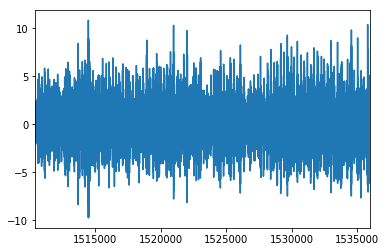

In [35]:
dfq['vibration_1'].plot()

In [27]:
l1+l1

[25600.0,
 0.04081715758559369,
 2.148570585277351,
 -9.7623784788,
 -1.3150289033,
 -0.03693152339999997,
 1.3288814118999999,
 10.8319895638,
 25600.0,
 0.04081715758559369,
 2.148570585277351,
 -9.7623784788,
 -1.3150289033,
 -0.03693152339999997,
 1.3288814118999999,
 10.8319895638]

In [23]:
pd.concat([l,l])

count    25600.000000
mean         0.040817
std          2.148571
min         -9.762378
25%         -1.315029
50%         -0.036932
75%          1.328881
max         10.831990
count    25600.000000
mean         0.040817
std          2.148571
min         -9.762378
25%         -1.315029
50%         -0.036932
75%          1.328881
max         10.831990
Name: vibration_1, dtype: float64

In [ ]:
'0'+m+'\\'+cs

In [29]:
#每一个csv_no文件的feature包括
#时间差
#spindle: max,min,std,25%,75%,min
#x_displacement: max, min, sum(abs())   and y and z
#displacement: max,min, sum()
#x_move, count, y_move, count, z_move, count
#，y总位移，z总位移，x最大位移，y最大位移，z最大位移，总最大位移，x_move次数，
#

#版本1s需要做每一s的数据

#

dflist=[]
for m in range(0,5):#机器循环
    
    df_m=df_all[df_all['Machine']==m]
    csvmax=df_m['csv_no'].max()
    
    df2=pd.DataFrame()
    print(m,csvmax)
    for csv in range(csvmax): #每一个csv的循环
        
        csvno=csv+1
        
        df=df_m[df_m['csv_no']==csvno]
        
        tmax=datetime.datetime.strptime(df['time'].max(),"%H:%M:%S:%f")
        tmin=datetime.datetime.strptime(df['time'].min(),"%H:%M:%S:%f")

        td=tmax-tmin
        duration=td.total_seconds()
        
        [c,spindle_load_mean,sl_std,sl_min,sl_25,sl_50,sl_75,sl_max]=df['spindle_load'].describe()

        x_disp_max=df['x_displacement'].abs().max()
        x_disp_sum=df['x_displacement'].abs().sum()
        x_disp_mean=df[df['x_displacement']!=0].x_displacement.abs().mean()
        
        y_disp_max=df['y_displacement'].abs().max()
        y_disp_sum=df['y_displacement'].abs().sum()
        y_disp_mean=df[df['y_displacement']!=0].y_displacement.abs().mean()
        
        z_disp_max=df['z_displacement'].abs().max()
        z_disp_sum=df['z_displacement'].abs().sum()
        z_disp_mean=df[df['z_displacement']!=0].z_displacement.abs().mean()
        
        x_move_count=df[df['x_move']!=0].count()[0]
        y_move_count=df[df['y_move']!=0].count()[0]
        z_move_count=df[df['z_move']!=0].count()[0]
        
        all_displacement=df['displacement'].sum()
        
        #写入新的df
        
#         print(df2)


    
        df2.loc[csvno,'Machine']=m
        df2.loc[csvno,'csv_no']=csvno
        df2.loc[csvno,'Duration']=duration
        
        df2.loc[csvno,'sl_mean']=spindle_load_mean
        df2.loc[csvno,'sl_std']=sl_std
        df2.loc[csvno,'sl_25']=sl_25
        df2.loc[csvno,'sl_50']=sl_50
        df2.loc[csvno,'sl_75']=sl_75
        df2.loc[csvno,'sl_max']=sl_max
        
        df2.loc[csvno,'x_disp_max']=x_disp_max
        df2.loc[csvno,'x_disp_mean']=x_disp_mean
        df2.loc[csvno,'x_disp_sum']=x_disp_sum
        
        df2.loc[csvno,'y_disp_max']=y_disp_max
        df2.loc[csvno,'y_disp_mean']=y_disp_mean
        df2.loc[csvno,'y_disp_sum']=y_disp_sum
        
        df2.loc[csvno,'z_disp_max']=z_disp_max
        df2.loc[csvno,'z_disp_mean']=z_disp_mean
        df2.loc[csvno,'z_disp_sum']=z_disp_sum
        
        df2.loc[csvno,'x_move_count']=x_move_count
        df2.loc[csvno,'y_move_count']=y_move_count
        df2.loc[csvno,'z_move_count']=z_move_count
        df2.loc[csvno,'displacement_all']=all_displacement
    dflist.append(df2)

0 10
1 10
2 10
3 10
4 10


In [30]:
dfnew=pd.concat(dflist)
dfnew.to_csv(dstfile)

In [166]:
dfnew

,Machine,csv_no,sl_mean,sl_std,sl_25,sl_50,sl_75,sl_max,x_disp_max,x_disp_mean,x_disp_sum,y_disp_max,y_disp_mean,y_disp_sum,z_disp_max,z_disp_mean,z_disp_sum,x_move_count,y_move_count,z_move_count
1,0.0,1.0,0.914081,2.760115,0.015259,0.033570,0.057985,36.545915,52.0000,20.377945,774.3619,13.8178,6.505908,253.7304,52.0000,10.488883,503.4664,38.0,39.0,48.0
2,0.0,2.0,13.331341,3.384573,11.178930,13.324381,15.164647,24.005860,43.3333,16.478999,3872.5647,43.2932,16.266769,3887.7577,0.0000,NaN,0.0000,235.0,239.0,0.0
3,0.0,3.0,13.701669,3.460452,11.081271,13.394574,15.994751,24.573504,44.6666,17.489855,4005.1769,40.8135,15.326437,3571.0599,0.0000,NaN,0.0000,229.0,233.0,0.0
4,0.0,4.0,13.355145,3.253814,11.105686,13.171789,15.286721,25.382244,57.3324,16.879777,3899.2286,43.3329,16.704484,3942.2583,0.0000,NaN,0.0000,231.0,236.0,0.0
5,0.0,5.0,13.851032,3.598315,11.578722,13.882870,15.814692,25.693533,44.6667,14.893245,3514.8059,42.0042,18.105812,4327.2891,0.0000,NaN,0.0000,236.0,239.0,0.0
6,0.0,6.0,13.781556,4.403636,11.169774,13.763848,16.425062,26.862392,62.7828,13.167179,3081.1199,49.3333,18.466946,4395.1332,2.3252,0.373286,5.2260,234.0,238.0,14.0
7,0.0,7.0,14.041365,4.727645,10.589923,14.160588,17.084262,26.670125,55.9447,12.489778,2935.0978,47.9820,18.342483,4292.1410,2.3384,0.373286,5.2260,235.0,234.0,14.0
8,0.0,8.0,14.185480,4.655623,10.852382,14.056825,17.529832,26.743370,46.0000,14.293632,3216.0673,65.4716,17.436806,3975.5918,2.3206,0.373286,5.2260,225.0,228.0,14.0
9,0.0,9.0,14.179666,4.616350,11.249123,13.721122,16.809595,26.865444,43.3333,15.085086,3484.6548,45.3334,16.124309,3773.0882,2.3300,0.373286,5.2260,231.0,234.0,14.0
10,0.0,10.0,14.053676,3.412040,11.548204,13.950011,16.168706,23.545030,46.0000,17.567756,4005.4483,85.1022,15.902373,3673.4481,0.0000,NaN,0.0000,228.0,231.0,0.0
